# Titulo

## Integrantes

- Aranda Huerta, Milene
- Escriba Flores, Daniel

---

# Introduccion


---

# 1. Entendimiento del negocio 

## Mision y Vision

### Mision

### Vision

## Objetivos


## Definicion del problema


## Preguntas de investigacion Analitica

## Indicadores y variables Criticas


---

# 2. Entendimiento de los Datos 

In [1]:
# Librerias Necesarias

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Analisis exploratorio de los datos (EDA)

In [2]:
# Cargar dataset

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets

# Unir X e y para procesamiento
df = pd.concat([X, y], axis=1)

# Mostrar primeros 4 registros
print("Datos originales:")
df.head(4)


Datos originales:


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


Nue

In [3]:
# Mape de las columnas

column_mapping = {
    "Attribute1": "status_cuenta_cheques",
    "Attribute2": "duracion_meses",
    "Attribute3": "historial_credito",
    "Attribute4": "propósito",
    "Attribute5": "monto_credito",
    "Attribute6": "cuenta_ahorro",
    "Attribute7": "empleo_desde",
    "Attribute8": "tasa_pagos",
    "Attribute9": "estado_civil_sexo",
    "Attribute10": "otros_deudores",
    "Attribute11": "residencia_desde",
    "Attribute12": "propiedad",
    "Attribute13": "edad",
    "Attribute14": "planes_pagos",
    "Attribute15": "vivienda",
    "Attribute16": "num_creditos_banco",
    "Attribute17": "trabajo",
    "Attribute18": "num_mantenidos",
    "Attribute19": "telefono",
    "Attribute20": "trabajador_extranjero",
    "class": "clase_crediticia"
}

df.rename(columns=column_mapping, inplace=True)

print("Datos con columnas renombradas:")
df.head(4)

Datos con columnas renombradas:


,status_cuenta_cheques,duracion_meses,historial_credito,propósito,monto_credito,cuenta_ahorro,empleo_desde,tasa_pagos,estado_civil_sexo,otros_deudores,...,propiedad,edad,planes_pagos,vivienda,num_creditos_banco,trabajo,num_mantenidos,telefono,trabajador_extranjero,clase_crediticia
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [4]:
#mostrar el tipo de datos de las columnas

print(df.dtypes)

status_cuenta_cheques    object
duracion_meses            int64
historial_credito        object
propósito                object
monto_credito             int64
cuenta_ahorro            object
empleo_desde             object
tasa_pagos                int64
estado_civil_sexo        object
otros_deudores           object
residencia_desde          int64
propiedad                object
edad                      int64
planes_pagos             object
vivienda                 object
num_creditos_banco        int64
trabajo                  object
num_mantenidos            int64
telefono                 object
trabajador_extranjero    object
clase_crediticia          int64
dtype: object


In [5]:
# Eliminiar filas cib valores faltantes

# Cantidad de filas con valores faltantes
print("Cantidad de filas con valores faltantes:")
print(df.isnull().sum())

Cantidad de filas con valores faltantes:
status_cuenta_cheques    0
duracion_meses           0
historial_credito        0
propósito                0
monto_credito            0
cuenta_ahorro            0
empleo_desde             0
tasa_pagos               0
estado_civil_sexo        0
otros_deudores           0
residencia_desde         0
propiedad                0
edad                     0
planes_pagos             0
vivienda                 0
num_creditos_banco       0
trabajo                  0
num_mantenidos           0
telefono                 0
trabajador_extranjero    0
clase_crediticia         0
dtype: int64


In [6]:
 # Descruocuib del dataset
df.describe()

,duracion_meses,monto_credito,tasa_pagos,residencia_desde,edad,num_creditos_banco,num_mantenidos,clase_crediticia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:


# separar en categoricas y numericas omitiendo la clase 

categoricas = df.select_dtypes(include=["object"]).columns
numericas = df.select_dtypes(include=["int64", "float64"]).columns
#numericas = numericas.drop("clase_crediticia")

print("Variables categoricas:")
print(categoricas)
print("\n")

print("Variables numericas:")
print(numericas)
print("\n")

Variables categoricas:
Index(['status_cuenta_cheques', 'historial_credito', 'propósito',
       'cuenta_ahorro', 'empleo_desde', 'estado_civil_sexo', 'otros_deudores',
       'propiedad', 'planes_pagos', 'vivienda', 'trabajo', 'telefono',
       'trabajador_extranjero'],
      dtype='object')


Variables numericas:
Index(['duracion_meses', 'monto_credito', 'tasa_pagos', 'residencia_desde',
       'edad', 'num_creditos_banco', 'num_mantenidos', 'clase_crediticia'],
      dtype='object')




In [8]:
# Calcular matriz de correlaciones
correlaciones = df[numericas].corr()
print("Matriz de correlaciones:")
print(correlaciones)
print("\n")

Matriz de correlaciones:
                    duracion_meses  monto_credito  tasa_pagos  \
duracion_meses            1.000000       0.624984    0.074749   
monto_credito             0.624984       1.000000   -0.271316   
tasa_pagos                0.074749      -0.271316    1.000000   
residencia_desde          0.034067       0.028926    0.049302   
edad                     -0.036136       0.032716    0.058266   
num_creditos_banco       -0.011284       0.020795    0.021669   
num_mantenidos           -0.023834       0.017142   -0.071207   
clase_crediticia          0.214927       0.154739    0.072404   

                    residencia_desde      edad  num_creditos_banco  \
duracion_meses              0.034067 -0.036136           -0.011284   
monto_credito               0.028926  0.032716            0.020795   
tasa_pagos                  0.049302  0.058266            0.021669   
residencia_desde            1.000000  0.266419            0.089625   
edad                        0.266419  1

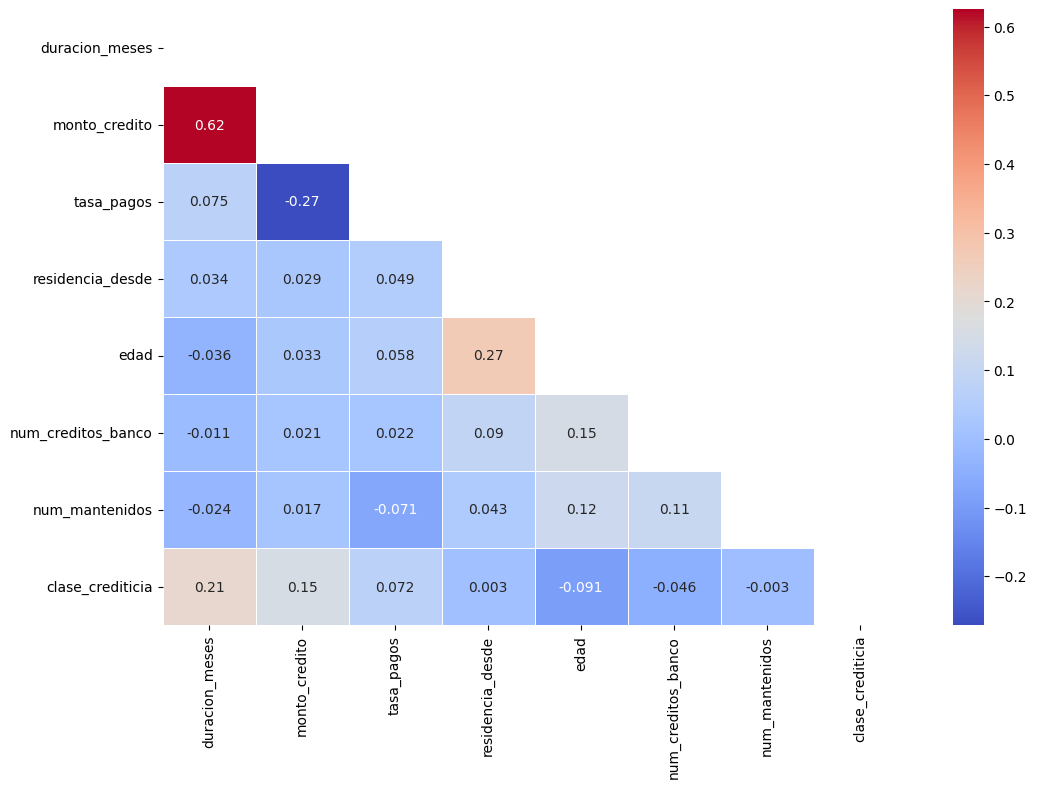

In [9]:
# Visualisar con heatmap

plt.figure(figsize=(12, 8)) 
sns.heatmap(correlaciones, annot=True, cmap="coolwarm",
            linewidths=0.5, mask=np.triu(correlaciones))
plt.show()

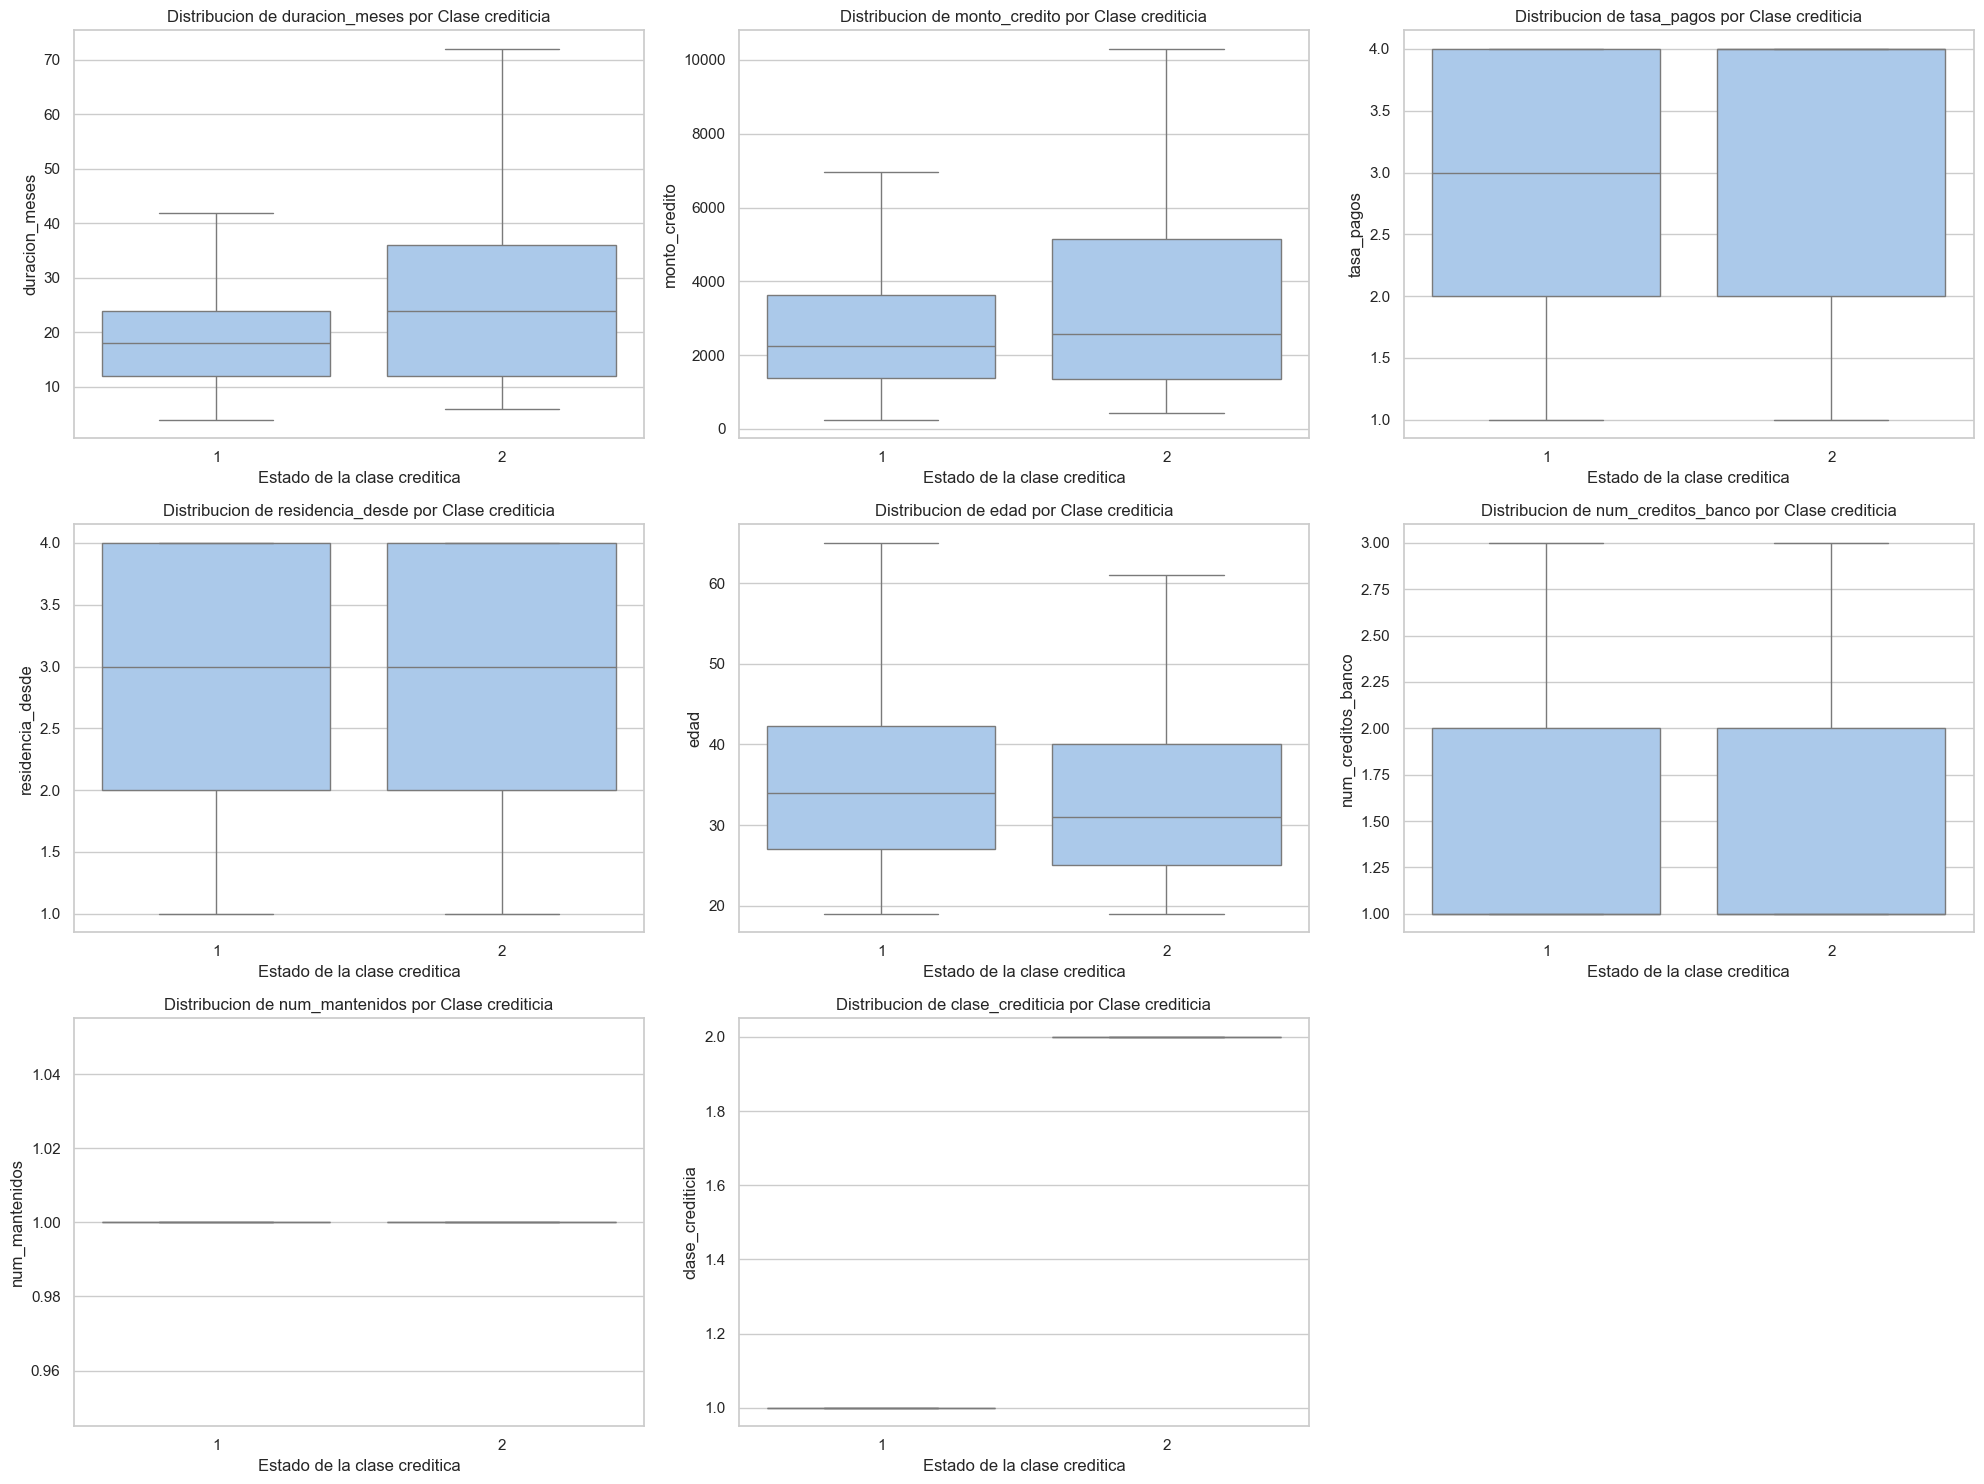

In [10]:
# Visualización de cada variable numerica en diagrma de caja

#numericas = numericas.drop("clase_crediticia")
# Configuración general del gráfico: tamaño y estilo visual
sns.set(style="whitegrid", palette="pastel")

num_cols = 3  # Número de columnas en la cuadrícula de gráficos
num_rows = int(np.ceil(len(numericas) / num_cols))  # Número de filas necesarias, redondeado hacia arriba

# Ajustar el tamaño de la figura en función del número de gráficos (variables numéricas)
plt.figure(figsize=(20, 5 * num_rows))

for i, columna in enumerate(numericas,1):
    plt.subplot(num_rows, num_cols, i) 

    sns.boxplot(x='clase_crediticia', y=columna, data=df,showfliers=False)
    plt.title(f'Distribucion de {columna} por Clase crediticia')
    plt.xlabel('Estado de la clase creditica')
    plt.ylabel(columna)

# Ajustar automáticamente los gráficos para que no se superpongan
plt.tight_layout()

plt.show()